# Configure What to Optimize with Loss Functions

Neural networks are trained using stochastic gradient descent and require that you choose a loss function when designing and configuring your model. There are many loss functions to choose from, and it can be challenging to know what to choose, or even what a loss function is and the role it plays when training a neural network. In this tutorial, you will discover the role of loss and loss functions in training deep learning neural networks and how to choose the right loss function for your predictive modeling problems. After reading this tutorial, you will know:
* Neural networks are trained using an optimization process that requires a loss function to calculate the model error.
* Maximum Likelihood provides a framework for choosing a loss function when training neural networks and machine learning models in general.
* Cross-entropy and mean squared errors are the two main types of loss functions when training neural network models.

## Loss Functions

This section will discover loss functions and how they are used to define the nature of the optimization problem that is solved when adapting neural network weights to a training dataset.

### Neural Network Learning as Optimization

A deep learning neural network learns to map inputs to a set of outputs from training data. We cannot calculate the perfect weights for a neural network; there are too many unknowns. Instead, the problem of learning is cast as a search or optimization problem, and an algorithm is used to navigate the space of possible sets of weights the model may use to make good or good enough predictions. Typically, a neural network model is trained using the stochastic gradient descent optimization algorithm, and weights are updated using the backpropagation of the error algorithm.

The gradient in gradient descent refers to an error gradient. The model with a given set of weights is used to make predictions, and the error for those predictions is calculated. The gradient descent algorithm seeks to change the weights so that the next evaluation reduces the error, meaning the optimization algorithm is navigating down the gradient (or slope) of error. Now that we know that training neural nets solves an optimization problem, we can look at how the error of a given set of weights is calculated.

### What Is a Loss Function and Loss?

In the context of an optimization algorithm, the function used to evaluate a candidate solution (i.e., a set of weights) is referred to as the objective function. We may seek to maximize or minimize the objective function, meaning that we are searching for a candidate solution with the highest or lowest score, respectively. Typically, with neural networks, we seek to minimize the error. The objective function is often referred to as a cost function or a loss function, and the value calculated by the loss function is referred to as simply loss.

The cost or loss function has an important job in that it must faithfully distill all aspects of the model down into a single number so that improvements in that number are a sign of a better model.

In calculating the error of the model during the optimization process, a loss function must be chosen. This can be a challenging problem as the function must capture the properties of the problem and be motivated by concerns that are important to the project and stakeholders.

### Maximum Likelihood

Many functions could be used to estimate the error of a set of weights in a neural network. We prefer a function where the space of candidate solutions maps onto a smooth (but high-dimensional) landscape that the optimization algorithm can reasonably navigate via iterative updates to the model weights. Maximum likelihood estimation, or MLE, is a framework for inference for finding the best statistical estimates of parameters from historical training data: exactly what we are trying to do with the neural network.

We have a training dataset with one or more input variables, and we require a model to estimate model weight parameters that best map examples of the inputs to the output or target variable. Given the input, the model is trying to make predictions that match the data distribution of the target variable. Under maximum Likelihood, a loss function estimates how closely the distribution of predictions made by a model matches the distribution of target variables in the training data.

A benefit of using maximum Likelihood as a framework for estimating the model parameters (weights) for neural networks and in machine learning, in general, is that as the number of examples in the training dataset is increased, the estimate of the model parameters improves. This is called the property of consistency.

### Maximum Likelihood and Cross-Entropy

Under the maximum likelihood framework, the error between two probability distributions is measured using cross-entropy. When modeling a classification problem where we are interested in mapping input variables to a class label, we can model the problem as predicting the probability of an example belonging to each class. In a binary classification problem, there would be two classes to predict the probability of the example belonging to the first class. In the case of multiple-class classification, we can predict a probability for the example belonging to each of the classes.

In the training dataset, the probability of an example belonging to a given class would be 1 or 0, as each sample in the training dataset is a known example from the domain. We know the answer. Therefore, under maximum likelihood estimation, we would seek a set of model weights that minimize the difference between the model's predicted probability distribution given the dataset and the distribution of probabilities in the training dataset. This is called cross-entropy.

Technically, cross-entropy comes from the field of information theory and has the unit of bits. It is used to estimate the difference between an estimated and a predicted probability distribution. In regression problems where a quantity is predicted, it is common to use the mean squared error (MSE) loss function instead.

Nevertheless, under the framework of maximum likelihood estimation and assuming a Gaussian distribution for the target variable, mean squared error can be considered the cross-entropy between the distribution of the model predictions and the distribution of the target variable.

Therefore, when using the maximum likelihood estimation framework, we will implement a cross-entropy loss function, which often in practice means a cross-entropy loss function for classification problems and a mean squared error loss function for regression problems. Deep learning neural networks are almost universally trained under the framework of maximum Likelihood using cross-entropy as the loss function.

Adopting this framework may be considered a milestone in deep learning, as before being fully formalized, it was sometimes common for neural networks for classification to use a mean squared error loss function.

The maximum likelihood approach was adopted almost universally, not just because of the theoretical framework but primarily because of its results. Specifically, neural networks for classification that use a sigmoid or softmax activation function in the output layer learn faster and more robustly using a cross-entropy loss function.

### What Loss Function to Use?

We can summarize the previous section and directly suggest the loss functions that you should use under the Maximum Likelihood framework. Importantly, the choice of the loss function is directly related to the activation function used in the output layer of your neural network. These two design elements are connected. Think of the configuration of the output layer as a choice about the framing of your prediction problem and the choice of the loss function as the way to calculate the error for a given framing of your problem.

We will review best practice or default values for each problem type with regard to the output layer and loss function.

**Regression Problem**
A problem where you predict a real-value quantity.
* Output Layer Configuration: One node with a linear activation unit.
* Loss Function: Mean Squared Error (MSE).

**Binary Classification Problem**
A problem where you classify an example as belonging to one of two classes. The problem is framed as predicting the Likelihood of an example belonging to class one, e.g., the class that you assign the integer value 1, whereas the other class is assigned the value 0.
* Output Layer Configuration: One node with a sigmoid activation unit.
* Loss Function: Cross-Entropy, also referred to as Logarithmic loss.

**Multiclass Classification Problem**
A problem where you classify an example as belonging to one of more than two classes. The problem is framed as predicting the Likelihood of an example belonging to each class.
* Output Layer Configuration: One node for each class using the softmax activation function.
* Loss Function: Cross-Entropy, also referred to as Logarithmic loss.

### How to Implement Loss Functions

This section explains how each of the main types of loss function works and how to calculate the score in Python to make the loss functions concrete.

**Mean Squared Error Loss**

Mean Squared Error loss, or MSE for short, is calculated as the average of the squared differences between the predicted and actual values. The result is always positive regardless of the sign of the predicted and actual values, and a perfect value is 0.0. The loss value is minimized, although it can be used in a maximization optimization process by making the score negative. The Python function below provides a pseudocode-like working implementation of a function for calculating the mean squared error for a list of actual and predicted real-valued quantities.

In [1]:
# calculate mean squared error
def mean_squared_error(actual, predicted):
    sum_square_error = 0.0
    
    for i in range(len(actual)):
        sum_square_error += (actual[i] - predicted[i])**2.0
    
    mean_square_error = 1.0 / len(actual) * sum_square_error
    return mean_square_error

For an efficient implementation, I'd encourage you to use the scikit-learn `mean_squared_error()` function.

**Cross-Entropy Loss (or Log Loss)**

Cross-entropy loss is often simply referred to as cross-entropy, logarithmic loss, logistic loss, or log loss for short. Each predicted probability is compared to the actual class output value (0 or 1), and a score is calculated that penalizes the probability based on the distance from the expected value. The penalty is logarithmic, offering a small score for small differences (0.1 or 0.2) and an enormous score for a large difference (0.9 or 1.0).

Cross-entropy loss is minimized, where smaller values represent a better model than larger values. A model that predicts perfect probabilities has a cross-entropy or log loss of 0.0. Cross-entropy for a binary or two-class prediction problem is calculated as the average cross-entropy across all examples. The Python function below provides a pseudocode-like working implementation of a function for calculating the cross-entropy for a list of actual 0 and 1 values compared to predicted probabilities for the class 1.

In [2]:
from math import log

# calculate binary cross-entropy
def binary_cross_entropy(actual, predicted):
    sum_score = 0.0
    
    for i in range(len(actual)):
        sum_score += actual[i] * log(1e-15 + predicted[i])
    
    mean_sum_score = 1.0 / len(actual) * sum_score
    return -mean_sum_score

Note, we add a very small value (in this case 1E-15) to the predicted probabilities to avoid ever calculating the log of 0.0. This means that the best possible loss will be a value very close to zero in practice, but not exactly zero. Cross-entropy can be calculated for multiple-class classification. The classes have been one hot encoded, meaning that there is a binary feature for each class value and the predictions must have predicted probabilities for each of the classes. The cross-entropy is then summed across each binary feature and averaged across all examples in the dataset. The Python function below provides a pseudocode-like working implementation of a function for calculating the cross-entropy for a list of actual one-hot encoded values compared to predicted probabilities for each class.

In [2]:
from math import log

# calculate categorical cross-entropy
def categorical_cross_entropy(actual, predicted):
    sum_score = 0.0
    
    for i in range(len(actual)):
        for j in range(len(actual[i])):
            sum_score += actual[i][j] * log(1e-15 + predicted[i][j])
    
    mean_sum_score = 1.0 / len(actual) * sum_score
    return -mean_sum_score

For an efficient implementation, I'd encourage you to use the scikit-learn `log_loss()` function.

### Loss Functions and Reported Model Performance

Given the maximum Likelihood framework, we want to use a cross-entropy or mean squared error loss function in general with stochastic gradient descent. Nevertheless, we may or may not want to report the model's performance using the loss function. For example, the logarithmic loss is challenging to interpret, especially for non-machine learning practitioner stakeholders. The same can be said for the mean squared error. Instead, it may be more important to report the accuracy and root mean squared error for models used for classification and regression, respectively.

It may also be desirable to choose models based on these metrics instead of loss. This is an important consideration, as the model with the minimum loss may not be the model with the best metric that is important to project stakeholders. A good division to consider is to use the loss to evaluate and diagnose how well the model is learning. This includes all of the considerations of the optimization process, such as overfitting, underfitting, and convergence. An alternate metric can then be chosen that has meaning to the project stakeholders to both evaluate model performance and perform model selection.
* Loss: Used to evaluate and diagnose model optimization only.
* Metric: Used to evaluate and choose models in the context of the project.

The same metric can be used for both concerns, but it is more likely that the concerns of the optimization process will differ from the goals of the project, and different scores will be required. Nevertheless, it is often the case that improving the loss improves or, at worst, does not affect the metric of interest.

## Regression Loss Functions Case Study

A regression predictive modeling problem involves predicting a real-valued quantity. In this section, we will investigate loss functions that are appropriate for regression predictive modeling problems. As the context for this investigation, we will use a standard regression problem generator provided by the scikit-learn library in the `make_regression()` function. This function will generate examples from a simple regression problem with a given number of input variables, statistical noise, and other properties. We will use this function to define a problem that has 20 input features; 10 of the features will be meaningful, and ten will not be relevant. A total of 1,000 examples will be randomly generated. The pseudorandom number generator will be fixed to ensure that we get the same 1,000 examples each time the code is run.

In [4]:
from sklearn.datasets import make_regression

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

Neural networks generally perform better when the real-valued input and output variables are scaled to a sensible range. For this problem, each of the input variables and the target variable have a Gaussian distribution; therefore, standardizing the data, in this case, is desirable. We can achieve this using the `StandardScaler` transformer class also from the scikit-learn library. On a real problem, we would prepare the scaler on the training dataset and apply it to the train and test sets, but for simplicity, we will scale all of the data together before splitting it into train and test sets.

In [5]:
from sklearn.preprocessing import StandardScaler

# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

Once scaled, the data will be split evenly into train and test sets.

In [6]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

A small Multilayer Perceptron (MLP) model will be defined to address this problem and provide the basis for exploring different loss functions. The model will expect 20 features as input as defined by the problem. The model will have one hidden layer with 25 nodes and will use the rectified linear activation function. The output layer will have one node, given the one real-value to be predicted, and will use the linear activation function.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

The model will be fit with stochastic gradient descent with a learning rate of 0.01 and a momentum of 0.9, both sensible default values. Training will be performed for 100 epochs, and the test set will be evaluated at the end of each epoch to plot learning curves at the end of the run.

```
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='...', optimizer=opt)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
```

Now that we have the basis of a problem and model, we can evaluate three common loss functions that are appropriate for a regression predictive modeling problem. Although an MLP is used in these examples, the same loss functions can be used when training CNN and RNN models for regression.

### Mean Squared Error Loss

The Mean Squared Error, or MSE, loss is the default loss to use for regression problems. Mathematically, the preferred loss function under the inference framework of maximum Likelihood if the distribution of the target variable is Gaussian. It is the loss function to be evaluated first and only changed if you have a good reason. Mean squared error is calculated as the average of the squared differences between the predicted and actual values. The result is always positive regardless of the sign of the predicted and actual values, and a perfect value is 0.0. The squaring means that larger mistakes result in more errors than smaller mistakes, meaning that the model is punished for making larger mistakes. The mean squared error loss function can be used in Keras by specifying `mse` or `mean squared error` as the loss function when compiling the model.

```
model.compile(loss='mean_squared_error')
```

It is recommended that the output layer has one node for the target variable, and the linear activation function is used.

```
model.add(Dense(1, activation='linear'))
```

A complete example of demonstrating an MLP on the described regression problem is listed below.

In [12]:
# mlp for regression with mse loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.003, Test: 0.012


Running the example first prints the mean squared error for the model on the train and test datasets.

**Note**: Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we can see that the model learned the problem achieving zero error, at least to three decimal places.

A line plot is also created showing the mean squared error loss over the training epochs for both the train (blue) and test (orange) sets. We can see that the model converged reasonably quickly, and both train and test performance remained equivalent. The performance and convergence behavior of the model suggest that mean squared error is a good match for a neural network learning this problem.

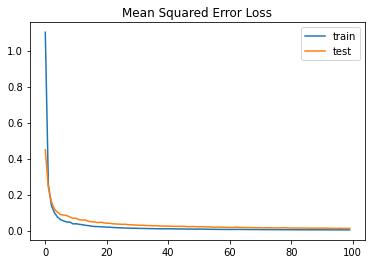

In [13]:
# plot loss during training
from matplotlib import pyplot
pyplot.title('Mean Squared Error Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### Mean Squared Logarithmic Error Loss

There may be regression problems in which the target value has a spread of values, and when predicting a large value, you may not want to punish a model as heavily as mean squared error. Instead, you can first calculate the natural logarithm of each predicted value and then calculate the mean squared error. This is called the Mean Squared Logarithmic Error loss, or MSLE for short. It has the effect of relaxing the punishing impact of large differences in large predicted values.

As a loss measure, it may be more appropriate when the model is predicting unscaled quantities directly. Nevertheless, we can demonstrate this loss function using our simple regression problem. The model can be updated to use the `mean squared logarithmic error` loss function and keep the same configuration for the output layer. We will also track the mean squared error as a metric when fitting the model to measure performance and plot the learning curve.

```
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])
```

The complete example of using the MSLE loss function is listed below.

In [14]:
# mlp for regression with msle loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.092, Test: 0.135


Running the example first prints the mean squared error for the model on the train and test dataset.

**Note**: Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we can see that the model resulted in slightly worse MSE on both the training and test dataset. It may not be a good fit for this problem as the distribution of the target variable is a standard Gaussian.

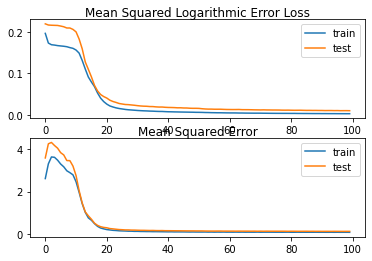

In [18]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Mean Squared Logarithmic Error Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error', pad=-20)
pyplot.plot(history.history['mse'], label='train')
pyplot.plot(history.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()

A line plot is also created showing the mean squared logistic error loss over the training epochs for both the train (blue) and test (orange) sets (top) and a similar plot for the mean squared error (bottom). We can see that the MSLE converged well over the 100 epochs algorithm; it appears that the MSE may be showing signs of overfitting the problem, dropping fast and starting to rise from epoch 20 onwards.

### Mean Absolute Error Loss

On some regression problems, the distribution of the target variable may be mostly Gaussian but may have outliers, e.g., large or small values far from the mean value. The Mean Absolute Error, or MAE, loss is an appropriate loss function in this case as it is more robust to outliers. It is calculated as the average of the absolute difference between the actual and predicted values. The model can be updated to use the `mean absolute error` loss function and keep the same configuration for the output layer.

```
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])
```

The complete example using the mean absolute error as the loss function on the regression test problem is listed below.

In [19]:
# mlp for regression with msle loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.005, Test: 0.008


Running the example first prints the mean squared error for the model on the train and test dataset.

**Note**: Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we can see that the model learned the problem, achieving a near-zero error, at least to three decimal places.

A line plot is also created showing the mean absolute error loss over the training epochs for both the train (blue) and test (orange) sets (top) and a similar plot for the mean squared error (bottom). In this case, we can see that MAE does converge but shows a bumpy course, although the dynamics of MSE don't appear greatly affected. We know that the target variable is a standard Gaussian with no large outliers, so MAE would not be a good fit in this case. It might be more appropriate for this problem if we did not scale the target variable first.

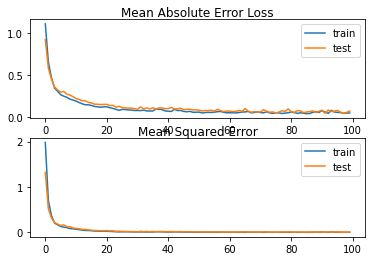

In [20]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Mean Absolute Error Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error', pad=-20)
pyplot.plot(history.history['mse'], label='train')
pyplot.plot(history.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()

## Binary Classification Loss Functions Case Study

Binary classification predictive modeling problems are those where examples are assigned one of two labels. The problem is often framed as predicting a value of 0 or 1 for the first or second class and is often implemented as predicting the probability of the example belonging to class value 1. In this section, we will investigate loss functions that are appropriate for binary classification predictive modeling problems. We will generate examples from the circles' test problem in scikit-learn as the basis for this investigation. The circles' problem involves samples drawn from two concentric circles on a two-dimensional plane, where points on the outer circle belong to class 0, and points for the inner circle belong to class 1. Statistical noise is added to the samples to add ambiguity and make the problem more challenging to learn. We will generate 1,000 examples and add 10% statistical noise. The pseudorandom number generator will be seeded with the same value to ensure that we always get the same 1,000 examples.

```
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
```

We can create a scatter plot of the dataset to get an idea of the modeling problem. The complete example is listed below.

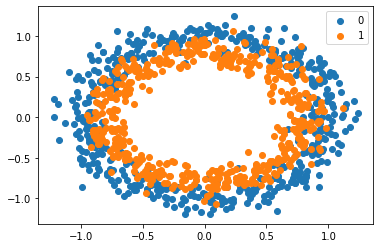

In [22]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot

# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# select indices of points with each class label
for i in range(2):
    samples_ix = where(y == i)
    pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))

pyplot.legend()
pyplot.show()

Running the example creates a scatter plot of the examples, where the input variables define the location of the point and the class value defines the color, with class 0 blue and class 1 orange.

The points are already reasonably scaled around 0, almost in [-1,1]. We won't rescale them in this case. The dataset is split evenly for train and 
test sets.

In [23]:
#split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

A simple MLP model can be defined to address this problem that expects two inputs for the two features in the dataset, a hidden layer with 50 nodes, a rectified linear activation function, and an output layer that will need to be configured for the choice of the loss function.

```
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='...'))
```

The model will be fit using stochastic gradient descent with the sensible default learning rate of 0.01 and momentum of 0.9.

```
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='...', optimizer=opt, metrics=['accuracy'])
```

We will fit the model for 200 training epochs and evaluate the model's performance against the loss and accuracy at the end of each epoch so that we can plot learning curves.

```
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
```

Now that we have the basis of a problem and model, we can take a look at evaluating three common loss functions that are appropriate for a binary classification predictive modeling problem. Although an MLP is used in these examples, the same loss functions can be used when training CNN and RNN models for binary classification.

### Binary Cross-Entropy Loss

Cross-entropy is the default loss function to use for binary classification problems. It is intended to use binary classification where the target values are in the set f0, 1g. Mathematically, it is the preferred loss function under the inference framework of Maximum Likelihood. It is the loss function to be evaluated first and only changed if you have a good reason. Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for predicting class 1. The score is minimized, and a perfect cross-entropy value is 0. Cross-entropy can be specified as the loss function in Keras by specifying `binary_crossentropy` when compiling the model.

```
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
```

The function requires that the output layer is configured with a single node and a `sigmoid` activation to predict the probability for class 1.

```
model.add(Dense(1, activation='sigmoid'))
```

The complete example of an MLP with cross-entropy loss for the two circles binary classification problem is listed below.

In [24]:
# mlp for the circles problem with cross-entropy loss
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.834, Test: 0.848


Running the example first prints the classification accuracy for the model on the train and test dataset.

**Note**: Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we can see that the model learned the problem reasonably well, achieving about 83% accuracy on the training dataset and about 84% on the test dataset. The scores are reasonably close, suggesting the model is probably not over or underfit.

A figure is also created showing two line plots: the top with the cross-entropy loss over epochs for the train (blue) and test (orange) dataset. The bottom plot shows classification accuracy over epochs. The plot shows that the training process converged well. The plot for loss is smooth, given the continuous nature of the error between the probability distributions, whereas the line plot for accuracy shows bumps, given examples in the train and test set can ultimately only be predicted as correct or incorrect, providing less granular feedback on performance.

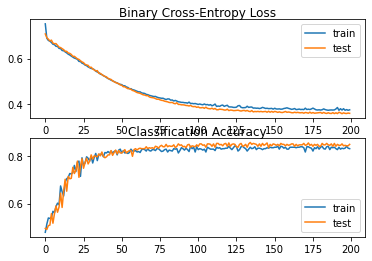

In [26]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Binary Cross-Entropy Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Classification Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

### Hinge Loss

An alternative to cross-entropy for binary classification problems is the hinge loss function, primarily developed using Support Vector Machine (SVM) models. It is intended for use with binary classification where the target values are in the set {-1, 1}. The hinge loss function encourages examples to have the correct sign, assigning more error when there is a difference in the sign between the actual and predicted class values. Reports of performance with the hinge loss are mixed, sometimes resulting in better performance than cross-entropy on binary classification problems. Firstly, the target variable must be modified to have values in the set {-1, 1}.

```
# change y from {0,1} to {-1,1}
y[where(y == 0)] = -1
```

The hinge loss function can then be specified as `hinge` in the compile function.

```
model.compile(loss='hinge', optimizer=opt, metrics=['accuracy'])
```

Finally, the output layer of the network must be configured to have a single node with a hyperbolic tangent activation function capable of outputting a single value in the range [-1, 1].

```
model.add(Dense(1, activation='tanh'))
```

The complete example of an MLP with a hinge loss function for the two circles binary classification problem is listed below.

In [27]:
# mlp for the circles problem with hinge loss
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from numpy import where

# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# change y from {0,1} to {-1,1}
y[where(y == 0)] = -1

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='hinge', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.408, Test: 0.400


Running the example first prints the classification accuracy for the model on the train and test dataset.

**Note**: Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we can see slightly worse performance than using cross-entropy, with the chosen model configuration with less than 80% accuracy on the train and test sets.

A  figure is also created showing two line plots, the top with the hinge loss over epochs for the train (blue) and test (orange) dataset, and the bottom plot showing classification accuracy over epochs. The plot of hinge loss shows that the model has converged and has a reasonable loss on both datasets. The plot of classification accuracy also shows signs of convergence, albeit at a lower level of skill than may be desirable on this problem.

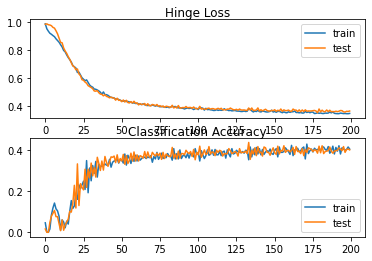

In [28]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Hinge Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Classification Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

### Squared Hinge Loss

The hinge loss function has many extensions, often the subject of an investigation with SVM models. A popular extension is called the squared hinge loss that calculates the square of the score hinge loss. It has the effect of smoothing the surface of the error function and making it numerically easier to work with. If using a hinge loss results in better performance on a given binary classification problem, a squared hinge loss may be appropriate. As with using the hinge loss function, the target variable must be modified to have values in the set {-1, 1}.

```
# change y from {0,1} to {-1,1}
y[where(y == 0)] = -1
```

The squared hinge loss can be specified as `squared_hinge` in the compile() function when defining the model.

```
model.compile(loss='squared_hinge', optimizer=opt, metrics=['accuracy'])
```

And finally, the output layer must use a single node with a hyperbolic tangent activation function capable of outputting continuous values in the range [-1, 1].

```
model.add(Dense(1, activation='tanh'))
```

The complete example of an MLP with the squared hinge loss function on the two circles binary classification problem is listed below.

In [29]:
# mlp for the circles problem with squared hinge loss
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from numpy import where

# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# change y from {0,1} to {-1,1}
y[where(y == 0)] = -1

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='squared_hinge', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.308, Test: 0.316


Running the example first prints the classification accuracy for the model on the train and test datasets.

**Note**: Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we can see that the hinge squared loss may not be appropriate for this problem and the chosen model configuration, resulting in classification accuracy of less than 70% on the train and test sets.

A figure is also created showing two line plots: the top with the squared hinge loss over epochs for the train (blue) and test (orange) dataset. The bottom plot shows classification accuracy over epochs. The plot of loss shows that the model converged, but the shape of the error surface is not as smooth as other loss functions where small changes to the weights are causing large changes in loss.

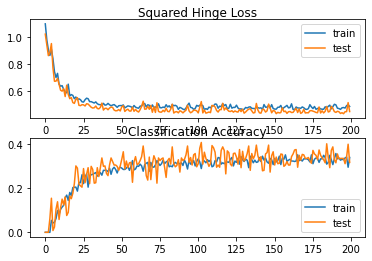

In [31]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Squared Hinge Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Classification Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## Multiclass Classification Loss Functions Case Study

Multiclass classification predictive modeling problems are those where examples are assigned one of more than two classes. The problem is often framed as predicting an integer value, where each class is assigned a unique integer value from 0 to (`num classes - 1`). The problem is often implemented as predicting the probability of the example belonging to each class. In this section, we will investigate loss functions that are appropriate for multiclass classification predictive modeling problems.

We will use the blobs problem as the basis for the investigation. The `make_blobs()` function provided by scikit-learn provides a way to generate examples given a specified number of classes and input features. We will use this function to generate 1,000 examples for a 3-class classification problem with two input variables. The pseudorandom number generator will be seeded consistently to generate the same 1,000 examples each time the code is run.

```
# generate dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
```

The two input variables can be taken as x and y coordinates for points on a two-dimensional plane. The example below creates a scatter plot of the entire dataset coloring points by their class membership.

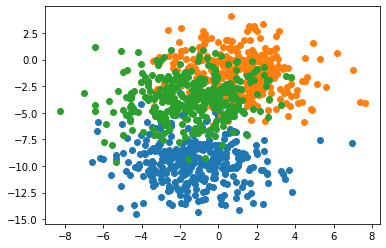

In [33]:
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
from numpy import where
from matplotlib import pyplot

# generate dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# select indices of points with each class label

for i in range(3):
    samples_ix = where(y == i)
    pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])
pyplot.show()

Running the example creates a scatter plot showing the 1,000 examples in the dataset with examples belonging to the 0, 1, and 2 classes colored blue, orange, and green.

The input features are Gaussian and could benefit from standardization; nevertheless, we will keep the values unscaled in this example for brevity. The dataset will be split evenly between train and test sets.

In [35]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

A small MLP model will be used as the basis for exploring loss functions. The model expects two input variables, has 50 nodes in the hidden layer with the rectified linear activation function, and an output layer that must be customized based on selecting the loss function.

```
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(..., activation='...'))
```

The model is fit using stochastic gradient descent with a sensible default learning rate of 0.01 and a momentum of 0.9.

```
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='...', optimizer=opt, metrics=['accuracy'])
```

The model will fit 100 epochs on the training dataset. The test dataset will be used as a validation dataset, allowing us to evaluate both loss and classification accuracy on the train and test sets at the end of each training epoch and draw learning curves.

```
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
```

Now that we have the basis of a problem and model, we can take a look at evaluating three common loss functions that are appropriate for a multiclass classification predictive modeling problem. Although an MLP is used in these examples, the same loss functions can be used when training CNN and RNN models for multiclass classification.

### Multiclass Cross-Entropy Loss

Cross-entropy is the default loss function to use for multiclass classification problems. In this case, it is intended for use with multiclass classification where the target values are in the set {0, 1, 3, ..., n}, where each class is assigned a unique integer value. Mathematically, it is the preferred loss function under the inference framework of Maximum Likelihood. It is the loss function to be evaluated first and only changed if you have a good reason. Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for all classes in the problem. The score is minimized, and a perfect cross-entropy value is 0. Cross-entropy can be specified as the loss function in Keras by specifying `categorical_crossentropy` when compiling the model.

```
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
```

The function requires that the output layer is configured with n nodes (one for each class), in this case, three nodes, and a `softmax` activation to predict the probability for each class.

```
model.add(Dense(3, activation='softmax'))
```

In turn, this means that the target variable must be one-hot encoded. This ensures that each example has an expected probability of 1.0 for the actual class value and an expected probability of 0.0 for all other class values. This can be achieved using the `to_categorical()` Keras function.

```
# one hot encode output variable
y = to_categorical(y)
```

The complete example of an MLP with cross-entropy loss for the multiclass blobs classification problem is listed below.

In [40]:
# mlp for the blobs multi-class classification problem with cross-entropy loss
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.796, Test: 0.780


Running the example first prints the classification accuracy for the model on the train and test dataset.

**Note**: Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we can see the model performed well, achieving a classification accuracy of about 82% on the training dataset and about 82% on the test dataset.

A figure is also created showing two line plots, the top with the cross-entropy loss over epochs for the train (blue) and test (orange) datasets, and the bottom plot showing classification accuracy over epochs. In this case, the plot shows the model seems to have converged. The line plots for both cross-entropy and accuracy both show good convergence behavior, although somewhat bumpy. The model may be well configured given no sign of over or underfitting. The learning rate or batch size may be tuned to even out the smoothness of the convergence in this case.

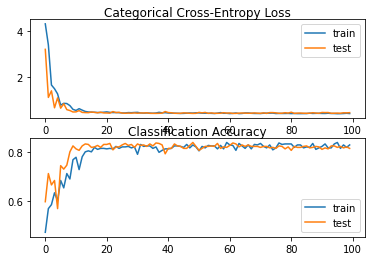

In [39]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Categorical Cross-Entropy Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Classification Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

### Sparse Multiclass Cross-Entropy Loss

A possible cause of frustration when using cross-entropy with classification problems with a large number of labels is the one-hot encoding process. For example, predicting words in a vocabulary may have tens or hundreds of thousands of categories, one for each label. This can mean that the target element of each training example may require a one-hot encoded vector with tens or hundreds of thousands of zero values, requiring significant memory. Sparse cross-entropy addresses this by performing the same cross-entropy calculation of error without requiring that the target variable be one-hot encoded prior to training. Sparse cross-entropy can be used in Keras for multiclass classification by using `sparse_categorical_crossentropy` when calling the `compile()` function.

```
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
```

The function requires that the output layer is configured with n nodes (one for each class), in this case, three nodes, and a `softmax` activation to predict the probability for each class.

```
model.add(Dense(3, activation='softmax'))
```

No one-hot encoding of the target variable is required, a benefit of this loss function. The complete example of training an MLP with sparse cross-entropy on the blobs multiclass classification problem is listed below.

In [41]:
# mlp for the blobs multi-class classification problem with sparse cross-entropy loss
from sklearn.datasets import make_blobs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.812, Test: 0.808


Running the example first prints the classification accuracy for the model on the train and test dataset.

**Note**: Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we can see the model achieves good performance on the problem. If you repeat the experiment many times, the average performance of sparse and non-sparse cross-entropy should be comparable.

A figure is also created showing two line plots, the top with the sparse cross-entropy loss over epochs for the train (blue) and test (orange) dataset, and the bottom plot showing classification accuracy over epochs. In this case, the plot shows good convergence of the model overtraining with regard to loss and classification accuracy.

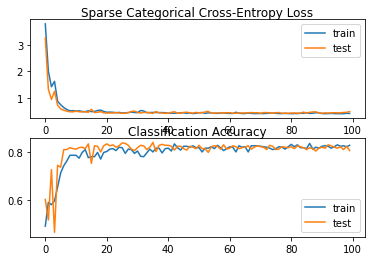

In [43]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Sparse Categorical Cross-Entropy Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Classification Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

### Kullback Leibler Divergence Loss

Kullback Leibler Divergence, or KL Divergence for short, is a measure of how one probability distribution differs from a baseline distribution. A KL divergence loss of 0 suggests the distributions are identical. In practice, the behavior of KL Divergence is very similar to cross-entropy. It calculates how much information is lost (in terms of bits) if the predicted probability distribution approximates the desired target probability distribution.

As such, the KL divergence loss function is more commonly used when using models that learn to approximate a more complex function than simply multiclass classification, such as in the case of an autoencoder used for learning a dense feature representation under a model that must reconstruct the original input. In this case, KL divergence loss would be
preferred. Nevertheless, it can be used for multiclass classification, in which case it is functionally equivalent to multiclass cross-entropy. KL divergence loss can be used in Keras by specifying `kullback_leibler_divergence` in the `compile()` function.

```
model.compile(loss='kullback_leibler_divergence', optimizer=opt, metrics=['accuracy'])
```

As with cross-entropy, the output layer is configured with n nodes (one for each class), three nodes, and a `softmax` activation to predict the probability for each class. Also, as with categorical cross-entropy, we must one-hot encode the target variable to have an expected probability of 1.0 for the class value and 0.0 for all other class values.

```
# one hot encode output variable
y = to_categorical(y)
```

The complete example of training an MLP with KL divergence loss for the blobs multiclass classification problem is listed below.

In [44]:
# mlp for the blobs multi-class classification problem with kl divergence loss
from sklearn.datasets import make_blobs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='kullback_leibler_divergence', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.824, Test: 0.816


Running the example first prints the classification accuracy for the model on the train and test dataset.

**Note**: Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we see a performance similar to those seen with cross-entropy loss, in this case, about 80% accuracy on the train and test dataset.

A figure is also created showing two line plots, the top with the KL divergence loss over epochs for the train (blue) and test (orange) dataset, and the bottom plot showing classification accuracy over epochs. In this case, the plot shows good convergence behavior for both loss and classification accuracy. An evaluation of cross-entropy would likely result in nearly identical behavior given the similarities in the measure.

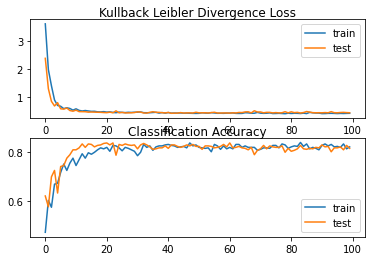

In [46]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Kullback Leibler Divergence Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Classification Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

**Extensions**

This section lists some ideas for extending the tutorial that you may wish to explore.
* **Alternate Regression Loss**. Experiment with alternate loss functions for regression such as Mean Absolute Percentage Error or MAPE.
* **Alternate Classification Loss**. Experiment with alternate loss functions for classification, such as categorical hinge loss.
* **Repeated Evaluation**. Create a repeated evaluation experiment and compare the average final loss and accuracy for categorical cross-entropy, sparse cross-entropy, and KL divergence to confirrm they are functionally equivalent.

**Summary**

In this tutorial, you discovered the role of loss and loss functions in training deep learning neural networks and how to choose the right loss function for your predictive modeling problems. Specifically, you learned:
* Neural networks are trained using an optimization process that requires a loss function to calculate the model error.
* Maximum Likelihood provides a framework for choosing a loss function when training neural networks and machine learning models in general.
* Cross-entropy and mean squared errors are the two main types of loss functions when training neural network models.